### ---
### Inport libraries

In [1]:
# Authored by Tiantian Xian
# 18 July 2019


import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz, filtfilt
import os
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

%matplotlib inline

### ---
### The following code read the single CSV files and Excel files and, process (analyse) the data in them

In [ ]:
# Input parameters
###########################################
# Path of the input and output data files
# path_input = '.\\input_data'
# path_output = '.\\output_data'

# The file name of the excel in the ouput data directory
input_excel_name = 'Ecoflex 30_preprocessing.xlsx'
output_excel_name = 'Ecoflex 30_processed.xlsx'

# Specify how many lines you want to skip (excluding the column label) before reading the data
input_skip_lines = 2
output_skip_lines = 0

# Number of sheets in the output data excel file
output_number_of_sheets = 2

# Specify the colume labels for the input data
input_col_list = ['Force (N)', 'Displacement (mm)']
# Specify the colume labels for the output data
output_col_list = ['Force (N)', 'Displacement (mm)']

# Low-pass filter parameters 
order = 3    # order of the smooth function (polynomial)
fs = 1000.0   # original sample frequency, Hz
cutoff = 1.0   # desired frequency of the filter, Hz

# The frequency of picking force
denominator = 0.4
# The precision/tolerance of the picking
precision = 0.0005
###########################################



# Define the filter function
#=================================================================
def lowpass_filter(data, cutoff, fs, order=order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
#=================================================================
        


# Initialisation
#=================================================================
# Initialise an array to store the processed data
processed_data = {}
# Create a Pandas Excel writer using XlsxWriter as the engine.
output_excel = pd.ExcelWriter(output_excel_name, engine='xlsxwriter')

# Read the names of the worksheets in the input excel
xl = pd.ExcelFile(input_excel_name)
sheetnames = xl.sheet_names
#================================================================= 


for ii in range(len(sheetnames)):
    # Read the data from the csv file
    sample1 = pd.read_excel(input_excel_name, sheet_name = ii, header=input_skip_lines)
    # Asign the colume labels for the data
    sample1.columns = input_col_list  


    # Filter the data
    #=================================================================
    # Define the data to be filtered
    data1 = sample1.loc[:,'Force (N)']
    data2 = sample1.loc[:,'Strain (mm)']

    # Filter the data using low-pass filter
    y1 = lowpass_filter(data1, cutoff, fs, order)
    y2 = lowpass_filter(data2, cutoff, fs, order)
    #=================================================================
    
    
    # Pick the data
    #=================================================================
#    new_y1 = []
#    new_y2 = []
    
#    for jj in range(len(y1)):
#        if np.mod(y1[jj],denominator) < precision:
#            new_y1 = np.hstack((new_y1,y1[jj]))
#            new_y2 = np.hstack((new_y2,y2[jj]))
    #=================================================================
    #=================================================================    
    max_f =max(y1)
    max_f=np.floor(10*max_f)

    max_f = int(max_f)
    
    new_y1 = np.zeros(max_f)
    new_y2 = np.zeros(max_f)

    
    for k in range(max_f):
        kk=0.1*k
        sum_1=0
        sum_2=0
        counter=0
    
        for m in range(len(y1)):
            if abs(y1[m]-kk) <= 0.05:
                sum_1+=y1[m]
                sum_2+=y2[m]
                counter +=1
        
        if counter==0:
            new_y1[k]= 0
            new_y2[k]= 0
        else:
            new_y1[k]=kk
            new_y2[k]=sum_2/ counter


    # Plot both the original and filtered signals
    #================================================================
    # Set the overall size of the figure
    plt.figure(figsize=(12,6))
    # Set the font size of the output figure
    plt.rcParams.update({'font.size': 12})

    plt.plot(data1, data2, 'b-', label='Raw data')
    plt.plot(new_y1, new_y2, 'ro', label='Filtered and averaged')
    plt.xlabel('Force (N)')
    plt.ylabel('Strain (mm)')
    #plt.grid()
    #plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')
    plt.legend()

    plt.show()

    #plt.savefig(cur_path + '\\' + result_figure_title1, dpi=100)
    #================================================================

    
    temp = (np.vstack((new_y1, new_y2))).T

    # Convert the array into Pandas DataFrame
    final_data = pd.DataFrame(data=temp, columns=output_col_list)

    # Write the processed final data to Excel
    final_data.to_excel(output_excel, sheet_name=sheetnames[ii] + ' processed')

# Close the Pandas Excel writer and output the Excel file.
output_excel.save()    
    
        

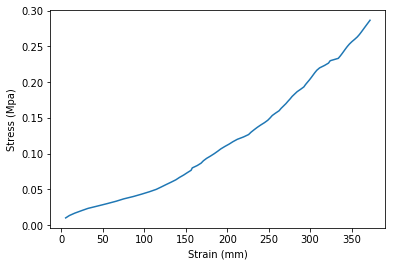

In [26]:
# Input parameters
###########################################
# Path of the input and output data files


# The file name of the excel in the ouput data directory
input_excel_name2 = 'Ecoflex 30_3.xlsx'

# Specify how many lines you want to skip (excluding the column label) before reading the data
input_skip_lines = 0

# Specify the colume labels for the input data
input_col_list = ['Stress (N)', 'Strain (mm)']


# Read the data from the csv file
sample2 = pd.read_excel(input_excel_name2, header=input_skip_lines)
# Asign the colume labels for the data
sample2.columns = input_col_list  

stress=sample2.iloc[:,0]
strain=sample2.iloc[:,1]
plt.plot(strain,stress)
plt.xlabel('Strain (mm)')
plt.ylabel('Stress (Mpa)')

w = np.zeros(len(stress))
lamda1 = np.zeros(len(stress))
lamda2 = np.zeros(len(stress))
lamda3 = np.zeros(len(stress))

# Calculate the strain energy density and stretch ratio
for i in range(len(stress)):
    w[i] = np.trapz(stress[0:i],strain[0:i])
    
    lamda2[i]= (np.sum(strain[i])+45)/45
    lamda1[i]= 1/math.sqrt((np.sum(strain[i])+45)/45)
    lamda3[i]= lamda1[i]
    


In [96]:
w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
strain

0       5.145944
1       9.611471
2      16.070313
3      23.888379
4      32.059670
5      43.753467
6      55.159913
7      65.979038
8      75.218488
9      86.917759
10     96.936967
11    106.261071
12    114.498008
13    120.498964
14    126.299387
15    132.306866
16    138.052883
17    142.429120
18    147.459184
19    151.854155
20    156.444025
21    157.881645
22    163.909181
23    168.526510
24    171.313462
25    175.131722
26    179.982315
27    184.476241
28    188.554121
29    192.394131
         ...    
54    288.523390
55    292.450483
56    294.502542
57    296.888585
58    299.312894
59    301.523115
60    303.625002
61    305.743242
62    308.103489
63    311.472693
64    317.302747
65    322.199823
66    324.226808
67    334.020424
68    336.425304
69    338.621721
70    340.692549
71    342.762802
72    344.954329
73    347.417318
74    350.389486
75    353.805498
76    356.966079
77    359.484269
78    361.682085
79    363.788559
80    365.888686
81    368.0122

In [28]:
lamda2

array([1.1143543 , 1.21358825, 1.35711808, 1.53085286, 1.71243712,
       1.97229927, 2.22577584, 2.46620084, 2.67152196, 2.93150575,
       3.15415482, 3.36135713, 3.54440018, 3.67775476, 3.80665305,
       3.94015258, 4.06784185, 4.16509155, 4.27687076, 4.37453679,
       4.47653389, 4.508481  , 4.64242625, 4.74503356, 4.80696582,
       4.89181604, 4.99960699, 5.09947202, 5.19009157, 5.27542513,
       5.38113519, 5.49629679, 5.59758564, 5.71517602, 5.88270121,
       6.01757712, 6.08398253, 6.1643605 , 6.2482492 , 6.34175679,
       6.44379604, 6.5317588 , 6.59538791, 6.65232007, 6.74022077,
       6.83573373, 6.88943579, 6.95471247, 7.01930631, 7.07456723,
       7.1327109 , 7.18445408, 7.2513479 , 7.31934803, 7.41163089,
       7.49889963, 7.54450094, 7.59752411, 7.65139764, 7.70051366,
       7.74722226, 7.79429426, 7.84674419, 7.92161539, 8.05117216,
       8.15999606, 8.20504017, 8.4226761 , 8.47611786, 8.52492714,
       8.57094554, 8.61695117, 8.66565175, 8.72038485, 8.78643

In [29]:
lamda1

array([0.94730178, 0.90774595, 0.85840291, 0.80822685, 0.76417475,
       0.71205509, 0.67028467, 0.63677467, 0.61181571, 0.58405618,
       0.56306495, 0.54543458, 0.53116399, 0.52144513, 0.51254069,
       0.50378297, 0.49581307, 0.48999057, 0.48354504, 0.47811676,
       0.47263846, 0.47096093, 0.46411702, 0.45907153, 0.45610463,
       0.45213168, 0.44723117, 0.44283037, 0.43894741, 0.4353828 ,
       0.43108514, 0.42654506, 0.42266825, 0.41829743, 0.41229836,
       0.40765162, 0.40542079, 0.40276895, 0.40005604, 0.39709572,
       0.39393912, 0.39127755, 0.38938555, 0.38771574, 0.3851793 ,
       0.38247886, 0.38098526, 0.37919309, 0.37744433, 0.37596729,
       0.37443177, 0.37308098, 0.37135616, 0.3696271 , 0.36731876,
       0.36517516, 0.36406987, 0.36279723, 0.36151774, 0.36036297,
       0.359275  , 0.35818847, 0.35698934, 0.3552983 , 0.35242803,
       0.35007011, 0.34910787, 0.34456801, 0.34348004, 0.34249534,
       0.34157465, 0.3406616 , 0.339703  , 0.33863526, 0.33736